In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LEARNING_RATE = 0.002
ITERATION_COUNT = 50000
EPSILON = 10**-5

In [3]:
train_df = pd.read_csv('./data/train.csv', index_col=0, header=0)
test_df = pd.read_csv('./data/test.csv', index_col=0, header=0)

In [4]:
def process_df(df):
    df['Sex'].replace(to_replace=['male', 'female'],
                      value=[0, 1],
                      inplace=True)

    mean_age = df['Age'].mean()
    estimated_mean_age = round(mean_age - 0.5) + 0.5
    df['Age'].fillna(estimated_mean_age, inplace=True)

In [5]:
process_df(train_df)
process_df(test_df)

In [6]:
train_features = train_df.iloc[:, 1:].to_numpy()
test_features = test_df.iloc[:, 1:].to_numpy()

train_truths = train_df.iloc[:, 0:1].to_numpy()
test_truths = test_df.iloc[:, 0:1].to_numpy()

num_records, num_features = train_features.shape

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



In [8]:
def get_theta(randomize):
    if randomize:
        return np.random.randn(num_features, 1)
    else:
        return np.zeros((num_features, 1))



In [9]:
def predict(features, theta, bias):
    return sigmoid(features @ theta + bias)

In [10]:
def get_cost(predictions, truths):
    return -np.mean(truths * np.log(predictions + EPSILON) +
                    (1 - truths) * np.log(1 - predictions + EPSILON))

In [11]:
def get_gradient(features, predictions, truths):
    return (features.T @ (predictions - truths)) / num_records

In [12]:
costs = []
def fit_model(learning_rate, iteration_count, randomize):
    theta = get_theta(randomize)
    bias = 0
    for iteration in range(iteration_count + 1):
        predictions = predict(train_features, theta, bias)

        gradient = get_gradient(train_features, predictions, train_truths)

        theta -= learning_rate * gradient
        bias -= learning_rate * (predictions - train_truths).mean()

        if iteration % 5000 == 0:
            cost = get_cost(predictions, train_truths)
            costs.append(cost)
            print(f"Iteration {iteration:6}: Cost = {cost}")
    return theta, bias

In [13]:
theta, bias = fit_model(LEARNING_RATE, ITERATION_COUNT, randomize=True)

Iteration      0: Cost = 1.7146167404041477
Iteration   5000: Cost = 0.6414699032593842
Iteration  10000: Cost = 0.5312558412011111
Iteration  15000: Cost = 0.48919333626293343
Iteration  20000: Cost = 0.47169137899616337
Iteration  25000: Cost = 0.4636988378857246
Iteration  30000: Cost = 0.4597130185180475
Iteration  35000: Cost = 0.4575446292310452
Iteration  40000: Cost = 0.45625249901183706
Iteration  45000: Cost = 0.4554062822375524
Iteration  50000: Cost = 0.4547995399522471


In [14]:
def get_accuracy(comparison):
    accuracy_decimal = comparison.mean()
    return round(accuracy_decimal, 5) * 100

In [15]:
def get_f1_score(confusion_matrix):
    true_positive = confusion_matrix.loc[1, True]
    false_positive = confusion_matrix.loc[0, True]
    false_negative = confusion_matrix.loc[1, False]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    return (2 * precision * recall) / (precision + recall)


In [16]:
def measure_model(features, truths, theta, bias):
    prediction_probabilities = predict(features, theta, bias)
    predictions = (prediction_probabilities >= 0.5)
    comparison = (predictions == truths)
    confusion_matrix = pd.crosstab(pd.Series(truths.flatten()),
                                pd.Series(predictions.flatten()),
                                rownames=['Actual'],
                                colnames=['Predicted'])

    loss = get_cost(prediction_probabilities, truths)
    accuracy = get_accuracy(comparison)
    f1_score = get_f1_score(confusion_matrix)

    print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}%")
    print(f"F1 Score: {f1_score}")


In [17]:
measure_model(train_features, train_truths, theta, bias)

Loss: 0.4547994346313001
Accuracy: 80.323%
F1 Score: 0.7381974248927038


In [18]:
measure_model(test_features, test_truths, theta, bias)

Loss: 0.437140377930921
Accuracy: 79.705%
F1 Score: 0.6927374301675978


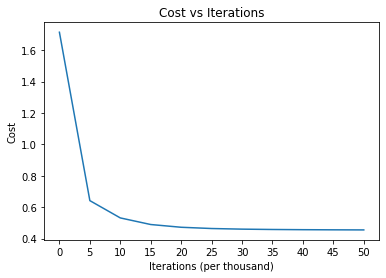

In [19]:
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per thousand)')
plt.xticks(ticks=np.arange(0, 11) ,labels=np.arange(0, 51, 5))
plt.title(f"Cost vs Iterations")
plt.show()